In [16]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import imutils

In [17]:
df = pd.read_csv('data/csv/with_pretreatment_span_3_pfe - with_pretreatment_span_3_pfe.csv',dtype=str)
df.head()

,Unnamed: 0,sentence,title,start_time,end_time,url,url_noSubs,total_time,total_words
0,0,little brother george bobby daddy pepper,gardening,00:01.7,00:25.4,https://www.youtube.com/watch?v=CTZJSVbzdyU&fe...,https://www.youtube.com/watch?v=uf4nvO22xOo&ab...,23.65,6
1,1,george playing granny grandpa house cat dream ...,gardening,00:23.8,00:49.0,https://www.youtube.com/watch?v=CTZJSVbzdyU&fe...,https://www.youtube.com/watch?v=uf4nvO22xOo&ab...,25.229,11
2,2,grandpa planting seed would still seed grow pl...,gardening,00:45.1,01:03.1,https://www.youtube.com/watch?v=CTZJSVbzdyU&fe...,https://www.youtube.com/watch?v=uf4nvO22xOo&ab...,18.09,9
3,3,little hole put seed cover earth water everyth...,gardening,00:58.9,01:14.2,https://www.youtube.com/watch?v=CTZJSVbzdyU&fe...,https://www.youtube.com/watch?v=uf4nvO22xOo&ab...,15.21,11
4,4,seed like even big apple tree yes tiny seed gr...,gardening,01:10.1,01:27.9,https://www.youtube.com/watch?v=CTZJSVbzdyU&fe...,https://www.youtube.com/watch?v=uf4nvO22xOo&ab...,17.85,14


In [18]:
row = df.iloc[0]
print(row.start_time)

00:01.7


In [19]:
videos = glob.glob('data/videos/*.mp4')
print(videos)

['data/videos\\bicycles.mp4', 'data/videos\\gardening.mp4', 'data/videos\\hiccups.mp4', 'data/videos\\musical instruments.mp4', 'data/videos\\picnic.mp4', 'data/videos\\secrets.mp4']


In [20]:
cap = cv2.VideoCapture('data/videos'+videos[0])

In [21]:
#path = os.path.join('/home/ziz/school/LOG795/object_extraction/data/videos/','*.mp4')
#videos = glob.glob(path)

# for video in videos:
#     ILSSUMM(video).save(path_video)


# video = '/home/ziz/school/LOG795/object_extraction/data/videos/Peppa Pig (Series 1) - Gardening (with subtitles)-CTZJSVbzdyU.mp4'
video = 'data/videos_summary/hiccups_sum.mp4'
frames_save = 'object_extraction/data/videos/video_frames/'

vidcap = cv2.VideoCapture(video)

video_length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
fps    = vidcap.get(cv2.CAP_PROP_FPS)
print(fps)

25.0


In [22]:
amount_frame = 10
fps    = vidcap.get(cv2.CAP_PROP_FPS)
video_length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
total_seconds_amount = int(video_length/fps)

nb_frames = (total_seconds_amount/fps)*amount_frame
print('Fps: '+ str(fps))
print('Video lenght: '+str(total_seconds_amount) +' secondes')
print('Total_amout frames : ' + str(video_length))
print(video_length/total_seconds_amount)

Fps: 25.0
Video lenght: 29 secondes
Total_amout frames : 740
25.517241379310345


In [23]:
import math 

count = 0

while vidcap.isOpened():
    
    frameId = vidcap.get(1)
    success,image = vidcap.read()
    
    if (success != True):
        break
        
    if (frameId % math.floor(fps) == 0):
#         filename = imagesFolder + "/image_" +  str(int(frameId)) + ".jpg"
        cv2.imwrite(frames_save+"frame%d.jpg" % int(total_seconds_amount-count), image)     # save frame as JPEG file      

    
#     cv2.imwrite(frames_save+"frame%d.jpg" % int(total_seconds_amount-count), image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count +=  1
vidcap.release()    

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [24]:
video_frames_path = os.path.join('object_extraction/data/videos/video_frames/')
frames = glob.glob(video_frames_path+'*.jpg')

In [25]:
print(len(frames))
print(frames[0])

15
object_extraction/data/videos/video_frames\frame-121.jpg


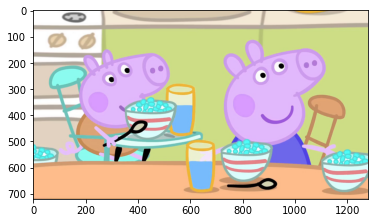

In [26]:
image = cv2.imread(frames[4])
plt.imshow(image)

In [27]:
# image = cv2.imread('pomme.jpg')
# image = cv2.imread('/home/ziz/school/LOG795/images/peppa-pig.png')
image_number = 0

for frame in frames:
    image = cv2.imread(frame)
    
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    canny = cv2.Canny(blurred, 120, 255, 1)
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(canny, kernel, iterations=1)
    
    # Find contours
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    # Iterate thorugh contours and filter for ROI
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]
        cv2.imwrite("object_extracted/test/ROI_{}.png".format(image_number), ROI)
        image_number += 1


In [14]:
image_number = 0

for frame in frames:
    original = cv2.imread(frame)
    image = cv2.imread(frame)
    
    blurred = cv2.GaussianBlur(image, (5,5), 0)
    canny = cv2.Canny(blurred, 100, 255, 1)
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(canny, kernel, iterations=1)
    
    # Find contours
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    # Iterate thorugh contours and filter for ROI
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]
        cv2.imwrite("object_extracted/test/ROI_{}.png".format(image_number), ROI)
        image_number += 1
    

In [14]:
blurred = cv2.GaussianBlur(img, (41, 41), 0)
canny = cv2.Canny(blurred, 10, 79, 3)
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(canny, kernel, iterations=1)

plt.imshow(canny, cmap='gray')

NameError: name 'img' is not defined

In [135]:
# image = cv2.imread('/home/ziz/school/LOG795/object_extraction/data/videos/video_frames/frame-769.jpg')
image = cv2.imread('object_extraction/data/videos/video_frames/frame-196.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# # image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (13, 13), 0)
canny = cv2.Canny(blurred, 0, 200, 3)
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(canny, kernel, iterations=1)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# alpha = 50  # Kontrast (0-100)
# beta = 0  # Helligkeit (0-100)
# adjusted = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)
# edged = cv2.Canny(adjusted, 30, 200)
# blur = cv2.GaussianBlur(edged, (3, 3), 0)
# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)
twenty_percent = int(len(cnts) *0.9)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:twenty_percent]
image_number = 0
bigger_to_smaller_boxes = []

for c in cnts:
    rect = cv2.boundingRect(c)
    bigger_to_smaller_boxes.append(rect)

smaller_to_bigger_boxes = reversed(bigger_to_smaller_boxes)
smaller_to_bigger_boxes = list(smaller_to_bigger_boxes)
boxes = smaller_to_bigger_boxes.copy()
print(len(boxes))
print(type(smaller_to_bigger_boxes))
not_in = []

for i,s in enumerate(smaller_to_bigger_boxes):
    for b in bigger_to_smaller_boxes:
        # If top-left inner box corner is inside the bounding box
        if s[0] > b[0] and s[1] > b[1]:
            if (b[0] + b[2]) > (s[0] + s[2]) and (b[1] + b[3]) > (s[1] + s[3]):
                if not_in.count(s) == 0:
                    not_in.append(s)


print(not_in)
for b in not_in:
    print(b)
    boxes.remove(b)
                
for i in boxes:
    x,y,w,h = i
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite("test/ROI_{}.png".format(image_number), ROI)
    image_number += 1

38
<class 'list'>
[(1144, 651, 11, 12), (1200, 663, 12, 12), (1125, 630, 11, 12), (881, 301, 15, 15), (937, 328, 14, 16), (409, 171, 15, 16), (474, 143, 15, 16), (874, 630, 16, 26), (879, 298, 19, 20), (934, 326, 20, 20), (407, 169, 20, 20), (963, 602, 16, 54), (325, 596, 15, 58), (477, 589, 16, 63), (922, 654, 56, 21), (835, 650, 56, 22), (476, 646, 83, 22), (323, 649, 83, 22), (193, 510, 64, 52), (188, 415, 104, 82), (443, 293, 53, 52), (441, 291, 57, 56), (253, 383, 335, 214), (742, 240, 315, 271)]
(1144, 651, 11, 12)
(1200, 663, 12, 12)
(1125, 630, 11, 12)
(881, 301, 15, 15)
(937, 328, 14, 16)
(409, 171, 15, 16)
(474, 143, 15, 16)
(874, 630, 16, 26)
(879, 298, 19, 20)
(934, 326, 20, 20)
(407, 169, 20, 20)
(963, 602, 16, 54)
(325, 596, 15, 58)
(477, 589, 16, 63)
(922, 654, 56, 21)
(835, 650, 56, 22)
(476, 646, 83, 22)
(323, 649, 83, 22)
(193, 510, 64, 52)
(188, 415, 104, 82)
(443, 293, 53, 52)
(441, 291, 57, 56)
(253, 383, 335, 214)
(742, 240, 315, 271)


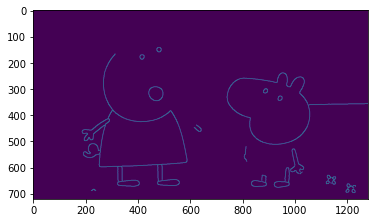

In [136]:
plt.imshow(canny)

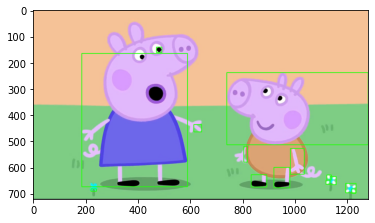

In [137]:
plt.imshow(image)

In [56]:
image = cv2.imread('pomme.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (13, 13), 0)
canny = cv2.Canny(blurred, 100, 240, 1)
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(canny, kernel, iterations=1)

# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and filter for ROI
image_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
#     cv2.imwrite("test/ROI_{}.png".format(image_number), ROI)
    image_number += 1

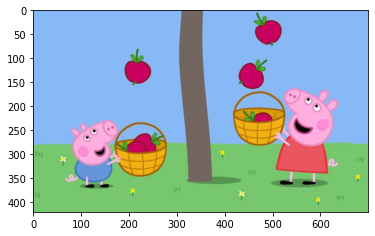

In [57]:
img = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(img)

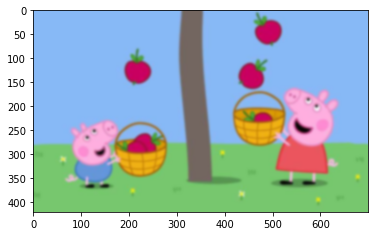

In [58]:
plt.imshow(blurred)

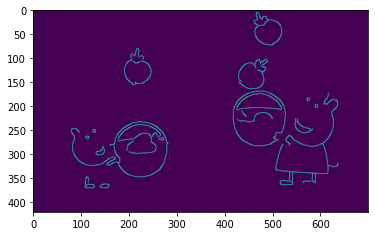

In [59]:
plt.imshow(canny)

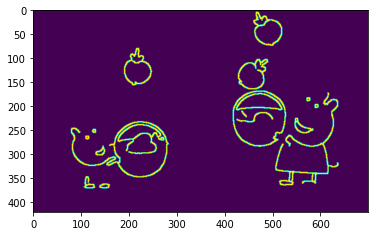

In [60]:
plt.imshow(dilate)

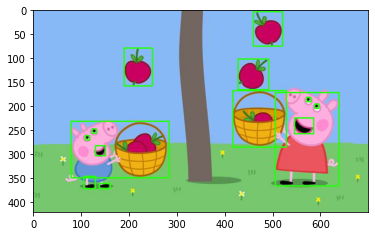

In [61]:
plt.imshow(image)

In [ ]:
CHAIN_APPROX_NONE

In [59]:
image = cv2.imread('pomme.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (13, 13), 0)
canny = cv2.Canny(blurred, 100, 240, 1)
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(canny, kernel, iterations=1)

# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and filter for ROI
image_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
#     cv2.imwrite("test/ROI_{}.png".format(image_number), ROI)
    image_number += 1

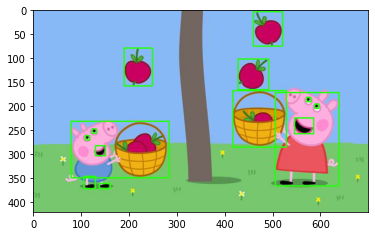

In [60]:
plt.imshow(image)